In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

from sklearn.linear_model import LinearRegression

In [273]:
train_data = pd.read_csv("drive/My Drive/Colab Data/DailyDelhiClimateTrain.csv") 
test_data = pd.read_csv("drive/My Drive/Colab Data/DailyDelhiClimateTest.csv") 

In [274]:
# Drop all features except meantemp which will be the predicted variable
train_data.drop(["humidity", "wind_speed", "meanpressure"], axis=1, inplace=True)
test_data.drop(["humidity", "wind_speed", "meanpressure"], axis=1, inplace=True)

In [275]:
train_data.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [276]:
test_data.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


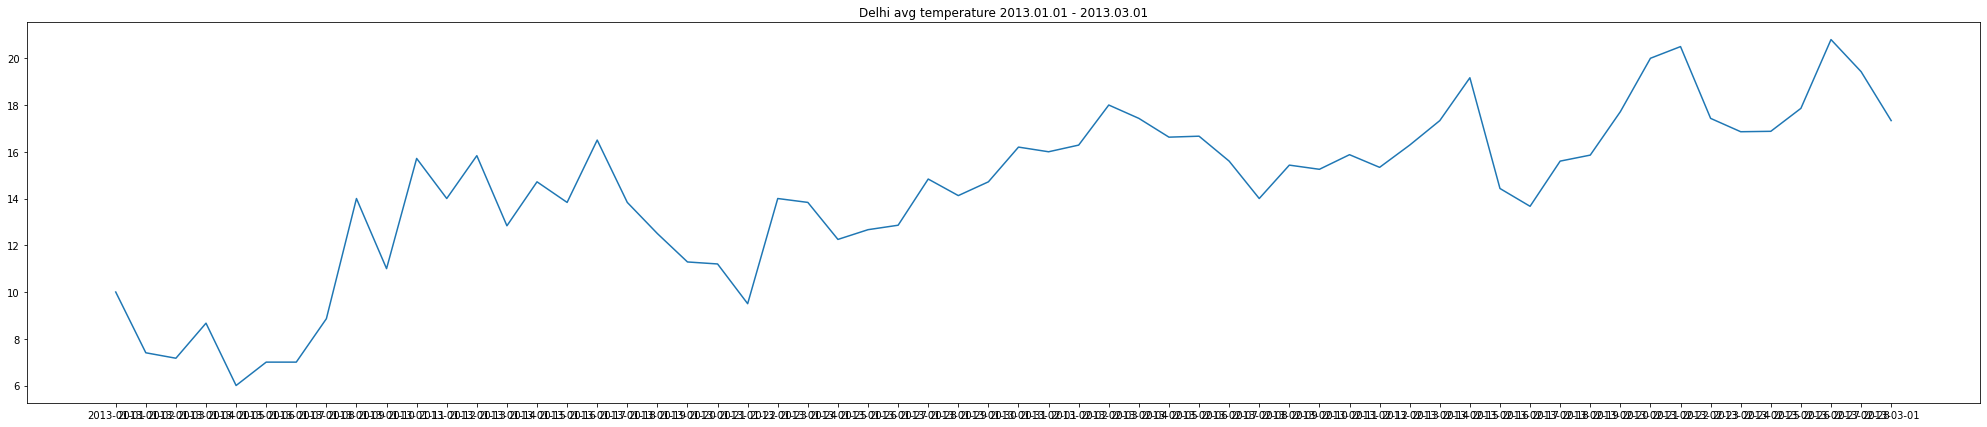

In [277]:
fig, ax = plt.subplots(1, 1, figsize=(35, 7))
ax.set_title("Delhi avg temperature 2013.01.01 - 2013.03.01")
ax.plot(train_data["date"][:60], train_data["meantemp"][:60])

In [278]:
train_end = len(train_data["date"])
train_data["day"] = np.array(list(range(train_end)))
test_data["day"] = np.array(list(range(train_end, train_end + len(test_data["date"]))))

In [279]:
train_data.drop("date", axis=1, inplace=True)
test_data.drop("date", axis=1, inplace=True)
X_train = pd.DataFrame(data=train_data.pop("day"))
X_test = pd.DataFrame(data=test_data.pop("day"))

In [280]:
mean = np.mean(train_data)
std_dev = np.std(train_data)
y_train = (train_data - mean) / std_dev
y_test = (test_data - mean) / std_dev

In [281]:
y_train.head()

,meantemp
0,-2.109500
1,-2.463454
2,-2.495219
3,-2.291015
4,-2.654044


In [282]:
y_test.head()

,meantemp
0,-1.304521
1,-0.952343
2,-1.141421
3,-0.925116
4,-0.967469


In [283]:
naive_lr = LinearRegression()
naive_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [284]:
naive_lr.score(X_test, y_test)

-0.7532017319718631